In [1]:
import pandas as pd
import glob
import os

folder_path = 'data/Day3 Data/'

file_pattern = os.path.join(folder_path, 'Reviews-*.csv')
files = glob.glob(file_pattern)

print("Files found:", files) 


df_list = [pd.read_csv(f) for f in files]


combined_df = pd.concat(df_list, ignore_index=True)


print(combined_df.head())
print(f"Total rows combined: {len(combined_df)}")


Files found: ['data/Day3 Data\\Reviews-1.csv', 'data/Day3 Data\\Reviews-2.csv', 'data/Day3 Data\\Reviews-3.csv', 'data/Day3 Data\\Reviews-4.csv']
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

            

In [4]:
import pandas as pd
import glob
import os

folder_path = 'data/Day3 Data/'

file_pattern = os.path.join(folder_path, 'Reviews-*.csv')
files = glob.glob(file_pattern)

print("Files found:", files) 


df_list = [pd.read_csv(f) for f in files]


combined_df = pd.concat(df_list, ignore_index=True)
df =combined_df
df = df.dropna(subset=['Text', 'Score'])

# Remove duplicates
df = df.drop_duplicates()

# Clean review text: lowercase, remove non-letters
df['Text'] = df['Text'].str.lower().str.replace('[^a-z ]', '', regex=True)

# Remove reviews shorter than 10 characters (optional)
df = df[df['Text'].str.len() > 10]

# Convert ratings to integer, if they aren't already
df['Score'] = df['Score'].astype(int)

# Basic feature engineering
df['review_length'] = df['Text'].str.len()
df['word_count'] = df['Text'].str.split().str.len()

# Preview the cleaned data
print(df.head())
print(df['Score'].value_counts())


Files found: ['data/Day3 Data\\Reviews-1.csv', 'data/Day3 Data\\Reviews-2.csv', 'data/Day3 Data\\Reviews-3.csv', 'data/Day3 Data\\Reviews-4.csv']
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

            

Files found: ['data/Day3 Data\\Reviews-1.csv', 'data/Day3 Data\\Reviews-2.csv', 'data/Day3 Data\\Reviews-3.csv', 'data/Day3 Data\\Reviews-4.csv']


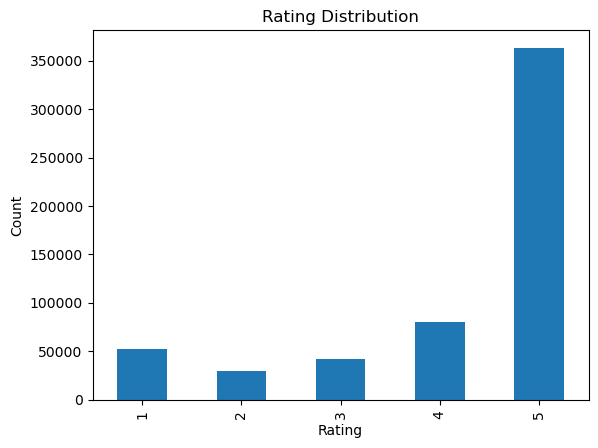

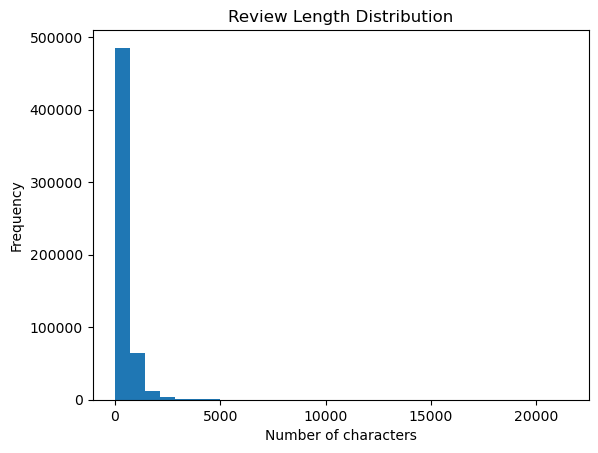

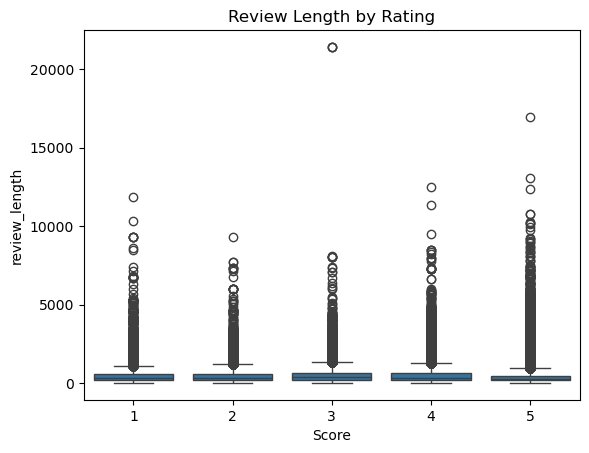

In [6]:
import pandas as pd
import glob
import os

folder_path = 'data/Day3 Data/'

file_pattern = os.path.join(folder_path, 'Reviews-*.csv')
files = glob.glob(file_pattern)

print("Files found:", files) 


df_list = [pd.read_csv(f) for f in files]


combined_df = pd.concat(df_list, ignore_index=True)
df =combined_df

import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for rating distribution
df['Score'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Histogram of review lengths
df['review_length'] = df['Text'].str.len()
df['review_length'].plot(kind='hist', bins=30, title='Review Length Distribution')
plt.xlabel('Number of characters')
plt.show()

# Boxplot for review lengths by rating
sns.boxplot(x='Score', y='review_length', data=df)
plt.title('Review Length by Rating')
plt.show()


In [8]:
import pandas as pd
import glob
import os

folder_path = 'data/Day3 Data/'

file_pattern = os.path.join(folder_path, 'Reviews-*.csv')
files = glob.glob(file_pattern)

print("Files found:", files) 


df_list = [pd.read_csv(f) for f in files]


combined_df = pd.concat(df_list, ignore_index=True)
df =combined_df
#Creating imbalanced data
imbalanced_df = pd.concat([
    df[df['Score'] == 5].sample(n=1000, random_state=42, replace=True),
    df[df['Score'] == 4].sample(n=500, random_state=42, replace=True),
    df[df['Score'] == 3].sample(n=300, random_state=42, replace=True),
    df[df['Score'] == 2].sample(n=200, random_state=42, replace=True),
    df[df['Score'] == 1].sample(n=400, random_state=42, replace=True)
])

print(imbalanced_df['Score'].value_counts())
imbalanced_df.to_csv('data/cleaned_dataset/imbalanced_data.csv', index=False)


Files found: ['data/Day3 Data\\Reviews-1.csv', 'data/Day3 Data\\Reviews-2.csv', 'data/Day3 Data\\Reviews-3.csv', 'data/Day3 Data\\Reviews-4.csv']
Score
5    1000
4     500
1     400
3     300
2     200
Name: count, dtype: int64


Files found: ['data/Day3 Data\\Reviews-1.csv', 'data/Day3 Data\\Reviews-2.csv', 'data/Day3 Data\\Reviews-3.csv', 'data/Day3 Data\\Reviews-4.csv']


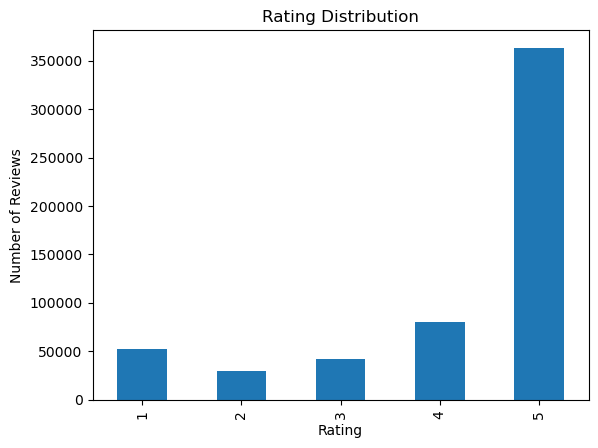

In [10]:



import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Load the cleaned data
folder_path = 'data/Day3 Data/'

file_pattern = os.path.join(folder_path, 'Reviews-*.csv')
files = glob.glob(file_pattern)

print("Files found:", files) 


df_list = [pd.read_csv(f) for f in files]


combined_df = pd.concat(df_list, ignore_index=True)
df =combined_df

# Bar chart showing the count for each rating
df['Score'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Rating Distribution')
plt.show()


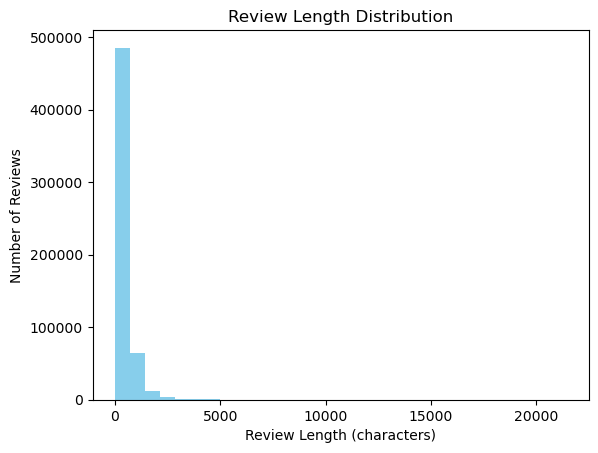

In [11]:

df['review_length'] = df['Text'].str.len()

# Histogram of review lengths
df['review_length'].plot(kind='hist', bins=30, color='skyblue')
plt.xlabel('Review Length (characters)')
plt.ylabel('Number of Reviews')
plt.title('Review Length Distribution')
plt.show()


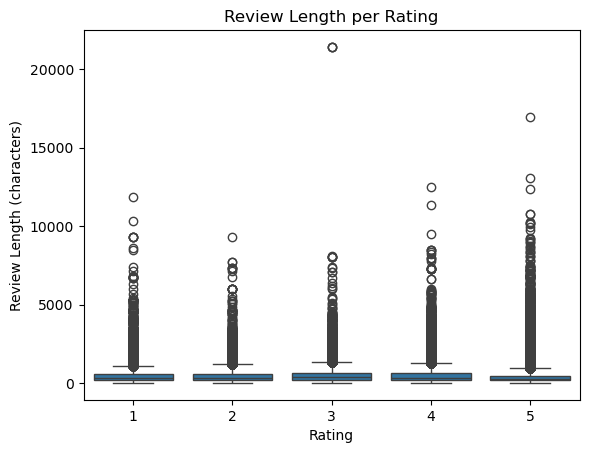

In [12]:
import seaborn as sns

# Boxplot to see how review length varies across ratings
sns.boxplot(x='Score', y='review_length', data=df)
plt.title('Review Length per Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (characters)')
plt.show()


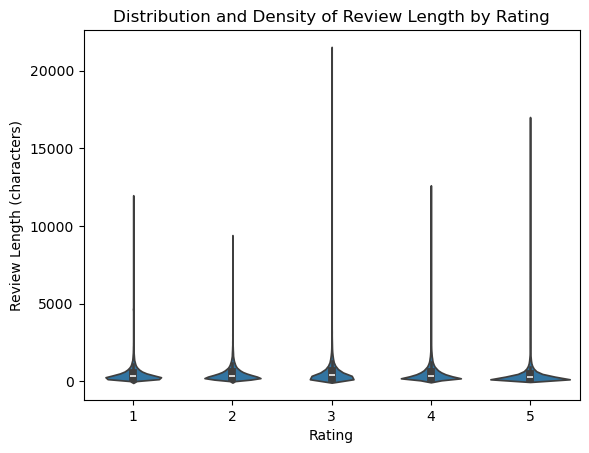

In [13]:
# Violin plots 
sns.violinplot(x='Score', y='review_length', data=df, inner='box')
plt.title('Distribution and Density of Review Length by Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length (characters)')
plt.show()


In [14]:
from collections import Counter
import itertools
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def get_top_words(texts, n=10):
    all_words = list(itertools.chain(*[t.split() for t in texts]))
    filtered_words = [w for w in all_words if w not in stop_words]
    return Counter(filtered_words).most_common(n)

#  Top 10 words for each rating
for rating in sorted(df['Score'].unique()):
    texts = df[df['Score'] == rating]['Text']
    print(f"Top words for rating {rating}:")
    print(get_top_words(texts, n=10))
    print()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top words for rating 1:
[('I', 147608), ('/><br', 25845), ('like', 23704), ('The', 19811), ('would', 15937), ('product', 15110), ('one', 13911), ('taste', 13134), ('It', 13057), ('This', 12504)]

Top words for rating 2:
[('I', 89357), ('like', 17353), ('/><br', 15653), ('The', 13222), ('taste', 10299), ('would', 9715), ('It', 7807), ('one', 7573), ('product', 7324), ('good', 6706)]

Top words for rating 3:
[('I', 126868), ('/><br', 27958), ('like', 24400), ('The', 19765), ('would', 14926), ('taste', 13967), ('good', 12789), ('It', 11464), ('coffee', 11440), ('one', 11292)]

Top words for rating 4:
[('I', 214088), ('/><br', 49100), ('like', 43357), ('The', 34921), ('good', 28838), ('would', 22544), ('one', 22347), ('It', 22044), ('taste', 21551), ('coffee', 20876)]

Top words for rating 5:
[('I', 810155), ('/><br', 139028), ('like', 126964), ('The', 106574), ('This', 92019), ('It', 83365), ('great', 82083), ('one', 81889), ('good', 80565), ('love', 79875)]



In [15]:
# Creating balanced dataset
target_n = 2000  # or adjust based on your available data

balanced_df = (
    df.groupby('Score', group_keys=False)
    .apply(lambda x: x.sample(n=target_n, random_state=42, replace=True))
)

print(balanced_df['Score'].value_counts())  

# Save balanced dataset
balanced_df.to_csv('data/cleaned_dataset/balanced_data.csv', index=False)


Score
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_3400\3747356814.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=target_n, random_state=42, replace=True))


In [17]:
#Imbalanced Rating Distribution

total_samples = 2000  

class_dist = {
    1: 0.10,
    2: 0.15,
    3: 0.25,
    4: 0.30,
    5: 0.20
}

samples_per_class = {rating: int(total_samples * pct) for rating, pct in class_dist.items()}
print(samples_per_class)



{1: 200, 2: 300, 3: 500, 4: 600, 5: 400}


In [22]:
#Creating imbalanced data
imbalanced_df = pd.concat([
    df[df['Score'] == rating].sample(
        n=n_samples, 
        random_state=42, 
        replace=(len(df[df['Score'] == rating]) < n_samples)  # Allows repeat if not enough data for a class
    )
    for rating, n_samples in samples_per_class.items()
])


In [24]:
imbalanced_df = imbalanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
imbalanced_df.to_csv('data/cleaned_dataset/imbalanced_data.csv', index=False)


In [26]:
print(imbalanced_df['Score'].value_counts())


Score
4    600
3    500
5    400
2    300
1    200
Name: count, dtype: int64


Score
1    10.0
2    15.0
3    25.0
4    30.0
5    20.0
Name: proportion, dtype: float64


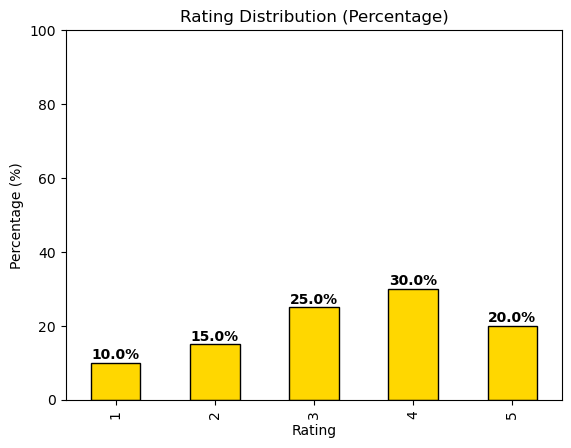

In [28]:
import matplotlib.pyplot as plt

distribution = imbalanced_df['Score'].value_counts(normalize=True).sort_index() * 100
print(distribution)

distribution.plot(kind='bar', color='gold', edgecolor='black')
plt.title("Rating Distribution (Percentage)")
plt.xlabel("Rating")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)

# Annotate with values
for i, v in enumerate(distribution):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')
plt.show()
